# Montando drive para fazer a coleta dos dados csv

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

dados = pd.read_csv('/content/drive/My Drive/nlp-machine-learning/imdb-reviews-pt-br.csv')
dados.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


# Atribuindo sentimentos de forma binária

In [0]:
dicionario = {
    'neg' : 0,
    'pos' : 1
}

dados['sentimento'] = dados.sentiment.replace(dicionario)

In [7]:
dados.head()

,id,text_en,text_pt,sentiment,sentimento
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


# Fazendo análise dos textos

Fazer análise de textos relacionados ao conteúdo. Após isso, importante ver a proporção de dados, e seria bom plotar gráfico sobre essa proporção pelo sentimento.

In [8]:
print('Negativo')

dados.text_pt[189]

Negativo


'Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.'

In [9]:
print('Positivo')

dados.text_pt[49002]

Positivo


'Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maior que você

In [10]:
print(dados.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


# Fazer Bag of words para identificar palavras que aparecem com maior frequência.

Após isso, usar parâmetros para melhorar a análise de dados e plotar com o WordCloud essas palavras. Assim sendo aparente pontos em comúm nos vocabulários, e podendo melhorar a coleta de dados final.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Assisti um ótimo filme', 'Assisti um péssimo filme']

vetorizar = CountVectorizer(lowercase=False)

bag_of_words = vetorizar.fit_transform(texto)


In [12]:
#Vetoriza a frase por palavras

vetorizar.get_feature_names()

['Assisti', 'filme', 'péssimo', 'um', 'ótimo']

In [0]:
#Nova maneira de trabalhar com matriz esparsa

matrix_sparse = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

In [14]:
matrix_sparse

,Assisti,filme,péssimo,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Assisti um ótimo filme', 'Assisti um péssimo filme']

vetorizar = CountVectorizer(lowercase=False, max_features = 50)

bag_of_words = vetorizar.fit_transform(dados.text_pt)

In [16]:
print(bag_of_words.shape)

(49459, 50)


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def classificar_texto(texto, coluna_texto, coluna_sentimento):

  vetorizar = CountVectorizer(lowercase=False, max_features = 50)
  bag_of_words = vetorizar.fit_transform(dados[coluna_texto])

  train_x, test_x, train_sentiment, test_sentiment = train_test_split(
                                      bag_of_words,
                                      dados[coluna_sentimento],
                                      random_state = 47)

  modelo = LogisticRegression()
  modelo.fit(train_x, train_sentiment)

  return modelo.score(test_x, test_sentiment)

print(classificar_texto(dados, "text_pt", "sentiment"))

0.6480388192478771


In [18]:
!pip install wordcloud 

In [27]:
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in dados.text_pt])

nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                           collocations=False).generate(todas_palavras)

nuvem_palavras


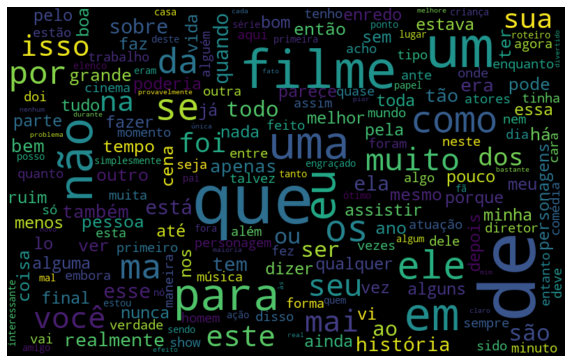

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
dados.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,sentimento
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [0]:
from wordcloud import WordCloud

def nuvem_palavra(sentimento, texto, coluna_texto ):

  palavras_sentiment = texto.query(f"sentiment == '{sentimento}'")

  todas_palavras = ' '.join([texto for texto in palavras_sentiment[coluna_texto]])

  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                            collocations=False).generate(todas_palavras)
  plt.figure(figsize=(10, 8))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()



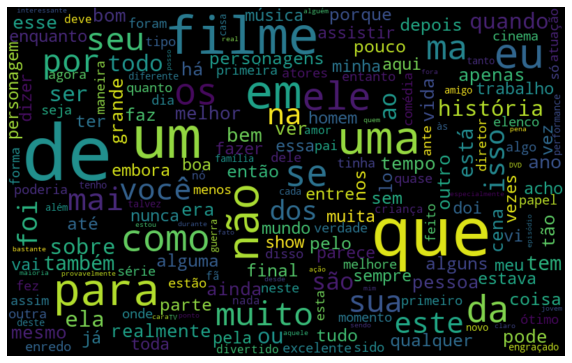

In [44]:
nuvem_palavra('pos', dados, 'text_pt')

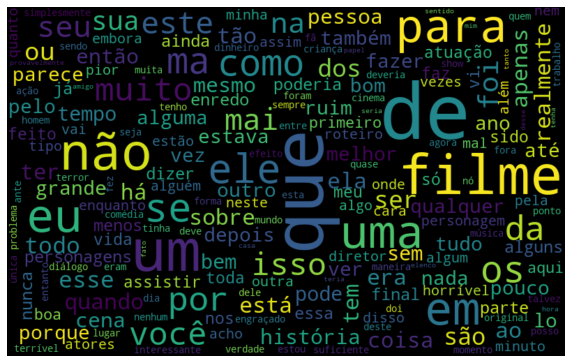

In [45]:
nuvem_palavra('neg', dados, 'text_pt')